# WeatherPy
----

### Analysis
*  Using 24 hour data, we can see that cities on or very near the equator did not experience the highest temperatures, although high temperatures were more consistent in that area and there was slightly less variability. The highest temperatures where instead experienced closer to the Tropics of Cancer and Capricorn, located at 20 and -20 degrees latitude respectively. This phenomenon and variability may be due to the differences in the number of cities that fall along these latitudes as well as the geographic features.
* Percent humidity doesn't seem to have much correlation to latitude. Several varying latitudes have % humidity ranging from 40 to 100%. However, based on this small date sampling, humidity does experience variation as we approach the Tropic of Cancer and Capricorn with some falling below 40% humidity. The cities on the equator experienced the 40% to 100% range.
*  No significant correlation was found between latitude and cloud cover or wind speed. Frequency of wind speed, however, can be observed. The most common observation was speeds between 0 and 10 mph. Observations decrease in frequency as you increase wind speed with rare occurrences of wind speeds greater than 10 mph
     
    
   

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import sys
!{sys.executable} -mpip install config
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
import sys
!{sys.executable} -m pip install citipy
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [45]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [51]:
# open weather api base url
base_url = "https://api.openweathermap.org/data/2.5/weather?"
api_key = "bff566da5dc946f2cd4500182dcd934c"

# set up lists to hold response data for name and rating

city_name = []
country = []
humidity = []
latitude =[]
longitude =[]
max_temp =[]
wind_speed=[]
cloudiness =[]
date =[]

#Data Retrieval
print ('Beginning Data Retrieval \n-----------------------------')
record =0
set=1

#Run loop to get the data for cities and other field
for index,city in enumerate(cities):
    target_url = base_url+ "appid=" + api_key + '&q=' + city + '&units='+ 'imperial'
    response = requests.get(target_url).json()
    print("Processing Record "+ str(index+1)+" of Set "+ str(set)+ "| "+ city)
    record +=1
    if record == 49:
        time.sleep(3)
        set+=1
        record=0
    try:
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']["all"])
        date.append(response['dt'])
       
    except:
        print("City not found. Skipping...")
        continue
print ("-----------------------------")
print ("Data Retrieval Complete")
print ("-----------------------------")



Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1| mount gambier
Processing Record 2 of Set 1| graham
Processing Record 3 of Set 1| yangambi
Processing Record 4 of Set 1| bababe
City not found. Skipping...
Processing Record 5 of Set 1| victoria
Processing Record 6 of Set 1| taolanaro
City not found. Skipping...
Processing Record 7 of Set 1| evensk
Processing Record 8 of Set 1| batemans bay
Processing Record 9 of Set 1| yellowknife
Processing Record 10 of Set 1| nayudupeta
Processing Record 11 of Set 1| vaini
Processing Record 12 of Set 1| bredasdorp
Processing Record 13 of Set 1| illoqqortoormiut
City not found. Skipping...
Processing Record 14 of Set 1| bilma
Processing Record 15 of Set 1| tiksi
Processing Record 16 of Set 1| nikolskoye
Processing Record 17 of Set 1| kapaa
Processing Record 18 of Set 1| hobart
Processing Record 19 of Set 1| tuktoyaktuk
Processing Record 20 of Set 1| isangel
Processing Record 21 of Set 1| san patricio
Processing Recor

Processing Record 188 of Set 4| sitka
Processing Record 189 of Set 4| kempsey
Processing Record 190 of Set 4| cayenne
Processing Record 191 of Set 4| ocampo
Processing Record 192 of Set 4| beringovskiy
Processing Record 193 of Set 4| santa isabel do rio negro
Processing Record 194 of Set 4| klaksvik
Processing Record 195 of Set 4| shelbyville
Processing Record 196 of Set 4| bagenalstown
Processing Record 197 of Set 5| vestmanna
Processing Record 198 of Set 5| alice springs
Processing Record 199 of Set 5| bumba
Processing Record 200 of Set 5| ixtapa
Processing Record 201 of Set 5| samusu
City not found. Skipping...
Processing Record 202 of Set 5| cabedelo
Processing Record 203 of Set 5| kenai
Processing Record 204 of Set 5| katsuura
Processing Record 205 of Set 5| sibolga
Processing Record 206 of Set 5| milingimbi
City not found. Skipping...
Processing Record 207 of Set 5| kaitangata
Processing Record 208 of Set 5| hoquiam
Processing Record 209 of Set 5| najran
Processing Record 210 of 

Processing Record 371 of Set 8| hay river
Processing Record 372 of Set 8| karaul
City not found. Skipping...
Processing Record 373 of Set 8| mahajanga
Processing Record 374 of Set 8| saint anthony
Processing Record 375 of Set 8| lunenburg
Processing Record 376 of Set 8| nowa ruda
Processing Record 377 of Set 8| geraldton
Processing Record 378 of Set 8| koungou
City not found. Skipping...
Processing Record 379 of Set 8| vagur
Processing Record 380 of Set 8| osoyoos
Processing Record 381 of Set 8| derzhavinsk
Processing Record 382 of Set 8| tuggurt
City not found. Skipping...
Processing Record 383 of Set 8| necochea
Processing Record 384 of Set 8| hobyo
Processing Record 385 of Set 8| kiunga
Processing Record 386 of Set 8| road town
Processing Record 387 of Set 8| lalibela
Processing Record 388 of Set 8| caala
Processing Record 389 of Set 8| anadyr
Processing Record 390 of Set 8| poum
Processing Record 391 of Set 8| azimur
City not found. Skipping...
Processing Record 392 of Set 8| wewak

Processing Record 552 of Set 12| mirwah
Processing Record 553 of Set 12| terme
Processing Record 554 of Set 12| mecca
Processing Record 555 of Set 12| gobabis
Processing Record 556 of Set 12| nome
Processing Record 557 of Set 12| bonthe
Processing Record 558 of Set 12| egvekinot
Processing Record 559 of Set 12| pangody
Processing Record 560 of Set 12| waddan
Processing Record 561 of Set 12| tawkar
City not found. Skipping...
Processing Record 562 of Set 12| sentyabrskiy
City not found. Skipping...
Processing Record 563 of Set 12| scarborough
Processing Record 564 of Set 12| solovetskiy
City not found. Skipping...
Processing Record 565 of Set 12| korla
City not found. Skipping...
Processing Record 566 of Set 12| saint-leu
Processing Record 567 of Set 12| comodoro rivadavia
Processing Record 568 of Set 12| natal
Processing Record 569 of Set 12| milkovo
Processing Record 570 of Set 12| dauriya
Processing Record 571 of Set 12| mumford
Processing Record 572 of Set 12| rumonge
Processing Rec

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [52]:
#Create Dataframe
weather_df = pd.DataFrame({"City":city_name,
                           "Cloudiness":cloudiness,
                           "Country":country,
                           "Date":date,
                           "Humidity":humidity,
                           "Lat":latitude,
                           "Lng":longitude,
                           "Max Temp": max_temp,
                           "Wind Speed":wind_speed})
weather_df.count()


City          544
Cloudiness    544
Country       544
Date          544
Humidity      544
Lat           544
Lng           544
Max Temp      544
Wind Speed    544
dtype: int64

In [53]:
#Export data to csv file
weather_df.to_csv('weather_data.csv',index=False, header=True)

In [54]:
#Display Dataframe
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Mount Gambier,75,AU,1544392800,77,-37.83,140.78,59.00,8.05
1,Graham,90,US,1544395200,97,36.07,-79.40,33.44,16.11
2,Yangambi,36,CD,1544396007,100,0.77,24.47,70.18,3.06
3,Victoria,75,BN,1544392800,94,5.28,115.24,78.80,1.12
4,Evensk,0,RU,1544396008,100,61.92,159.24,7.40,16.04


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

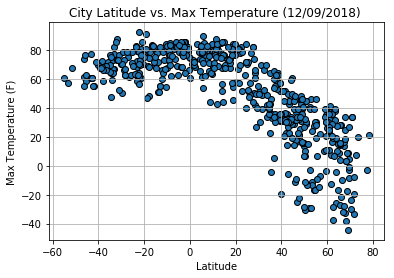

In [57]:
# Obtain the x and y coordinates
plt.scatter(weather_df['Lat'],weather_df['Max Temp'],edgecolors ="black")

#Create title
plt.title ("City Latitude vs. Max Temperature (12/09/2018) ")

#Create labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Add grid
plt.grid()

#Save Figure
plt.savefig("CityLat_Temp.png")

#Display Graph
plt.show()

#### Latitude vs. Humidity Plot

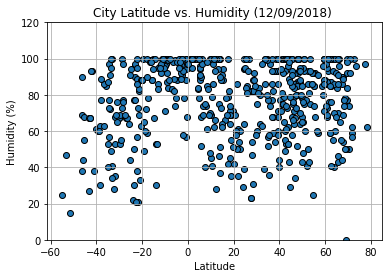

In [59]:
# Obtain the x and y coordinates
plt.scatter(weather_df['Lat'],weather_df['Humidity'], edgecolors ="black")

# Set the limits for the X and Y axes
plt.ylim(0,120)

#Create title
plt.title ("City Latitude vs. Humidity (12/09/2018) ")

#Create labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Add grid
plt.grid()

#Save Figure
plt.savefig("CityLat_Humidity.png")

#Display Graph
plt.show()

#### Latitude vs. Cloudiness Plot

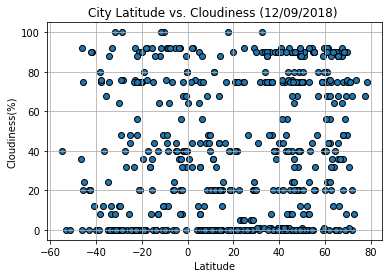

In [60]:
# Obtain the x and y coordinates
plt.scatter(weather_df['Lat'],weather_df['Cloudiness'], edgecolors ="black")


#Create title
plt.title ("City Latitude vs. Cloudiness (12/09/2018) ")

#Create labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")

#Add grid
plt.grid()

#Save Figure
plt.savefig("CityLat_Cloudiness.png")

#Display Graph
plt.show()

#### Latitude vs. Wind Speed Plot

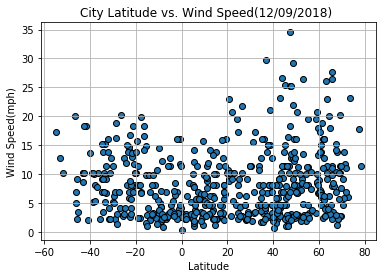

In [61]:
# Obtain the x and y coordinates
plt.scatter(weather_df['Lat'],weather_df['Wind Speed'], edgecolors ="black")


#Create title
plt.title ("City Latitude vs. Wind Speed(12/09/2018) ")

#Create labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")

#Add grid
plt.grid()

#Save Figure
plt.savefig("CityLat_Wind Speed.png")

#Display Graph
plt.show()